# ML & AI - Spring 2023
### Name: Adam Harrold
### Date: 05/05/23

## Q1 A. 
Regularization, feature scaling, and cross-validation are techniques that help improve model performance in supervised learning, including support vector machines. 

Regularization: It is a technique used to prevent overfitting by adding a penalty term to the loss function. It helps to control the complexity of the model and avoids it from fitting too closely to the training data, allowing for better generalization to unseen data. In SVMs, the regularization parameter (C) determines the trade-off between maximizing the margin and minimizing classification error. 

Feature scaling: It involves normalizing or standardizing the input features so that they are on a similar scale. This helps the optimization algorithms converge faster and prevents features with larger magnitudes from dominating the model. In SVMs, feature scaling is crucial because the algorithm aims to maximize the margin, which can be sensitive to the scale of the input features. 

Cross-validation: It is a technique for assessing model performance and selecting the best hyperparameters. By splitting the training data into multiple folds and training the model on different subsets, cross-validation helps estimate the model's generalization capability. In SVMs, cross-validation can be used to select the optimal values for hyperparameters like the regularization parameter (C) and the kernel parameters. 

These principles are applicable to various supervised learning algorithms, helping them generalize better and prevent overfitting.

## Q1 B. 
Given a new day with rainy weather, calculate the probability of people playing golf using the Naive Bayes algorithm. 

To calculate the probability of people playing golf on a rainy day using the Naive Bayes algorithm, we need to find the conditional probabilities: 
P(Golf = Yes) = 6/10 P(Golf = No) = 4/10 P(Rainy | Golf = Yes) = 1/6 P(Rainy | Golf = No) = 2/4 

Using Bayes' theorem: P(Golf = Yes | Rainy) = P(Rainy | Golf = Yes) * P(Golf = Yes) / P(Rainy) P(Golf = No | Rainy) = P(Rainy | Golf = No) * P(Golf = No) / P(Rainy) 

To find P(Rainy): P(Rainy) = P(Rainy | Golf = Yes) * P(Golf = Yes) + P(Rainy | Golf = No) * P(Golf = No) P(Rainy) = (1/6) * (6/10) + (2/4) * (4/10) P(Rainy) = 1/10 + 1/5 = 3/10 

Now we can find the probabilities: P(Golf = Yes | Rainy) = (1/6) * (6/10) / (3/10) = 1/3 P(Golf = No | Rainy) = (2/4) * (4/10) / (3/10) = 2/3 

Thus, the probability of people playing golf on a rainy day is 1/3.

## Q2 A. 
Calculate the input for the hidden layer: 
Hidden layer input = Input vector * W1 = [0.5, 0.7] * [[0.1, 0.2, 0.3], [0.4, 0.5, 0.6]] 
Hidden layer input = (0.5 * 0.1 + 0.7 * 0.4, 0.5 * 0.2 + 0.7 * 0.5, 0.5 * 0.3 + 0.7 * 0.6) = (0.31, 0.39, 0.47) 

Apply the ReLU activation function to the hidden layer input: 
Hidden layer output = ReLU(Hidden layer input) = (max(0, 0.31), max(0, 0.39), max(0, 0.47)) = (0.31, 0.39, 0.47) 

Calculate the input for the output layer: 
Output layer input = Hidden layer output * W2 = (0.31, 0.39, 0.47) * [[0.7], [0.8], [0.9]] 
Output layer input = 0.31 * 0.7 + 0.39 * 0.8 + 0.47 * 0.9 = 0.977 

Apply the sigmoid activation function to the output layer input: 
Output = sigmoid(Output layer input) = 1 / (1 + exp(-0.977)) 
Output ≈ 0.726 

Thus, the output of the neural network is approximately 0.726.

## Q2 B. 
output_height = (6 - 3 + 2 * 0) / 2 + 1 = 2 
output_width = (6 - 3 + 2 * 0) / 2 + 1 = 2 

The dimensions of the feature map produced by the convolutional layer are 2x2. 

Number_of_parameters = (3 * 3 * 3 + 1) * 1 = 28 There are 28 parameters in the filter/kernel, including the bias term.

## Q3. Log regression using IMDB dataset

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, preprocessing, models, layers
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load and preprocess the dataset
max_features = 10000
max_len = 100

(x_train, y_train), (x_test, y_test) = datasets.imdb.load_data(num_words=max_features)
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=max_len)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=max_len)

In [ ]:
# Build the logistic regression model
model = models.Sequential([
    layers.Embedding(max_features, 16, input_length=max_len),
    layers.GlobalAveragePooling1D(),
    layers.Dense(1, activation='sigmoid')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=512, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/20
40/40 [==============================] - 2s 25ms/step - loss: 0.6900 - accuracy: 0.6383 - val_loss: 0.6859 - val_accuracy: 0.7098
Epoch 2/20
40/40 [==============================] - 1s 19ms/step - loss: 0.6814 - accuracy: 0.7355 - val_loss: 0.6764 - val_accuracy: 0.7310
Epoch 3/20
40/40 [==============================] - 1s 18ms/step - loss: 0.6702 - accuracy: 0.7440 - val_loss: 0.6643 - val_accuracy: 0.7380
Epoch 4/20
40/40 [==============================] - 1s 24ms/step - loss: 0.6564 - accuracy: 0.7473 - val_loss: 0.6501 - val_accuracy: 0.7414
Epoch 5/20
40/40 [==============================] - 1s 13ms/step - loss: 0.6407 - accuracy: 0.7552 - val_loss: 0.6343 - val_accuracy: 0.7490
Epoch 6/20
40/40 [==============================] - 0s 12ms/step - loss: 0.6233 - accuracy: 0.7666 - val_loss: 0.6176 - val_accuracy: 0.7550
Epoch 7/20
40/40 [==============================] - 0s 11ms/step - loss: 0.6049 - accuracy: 0.7763 - val_loss: 0.6006 - val_accuracy: 0.7658
Epoch 8/20
40

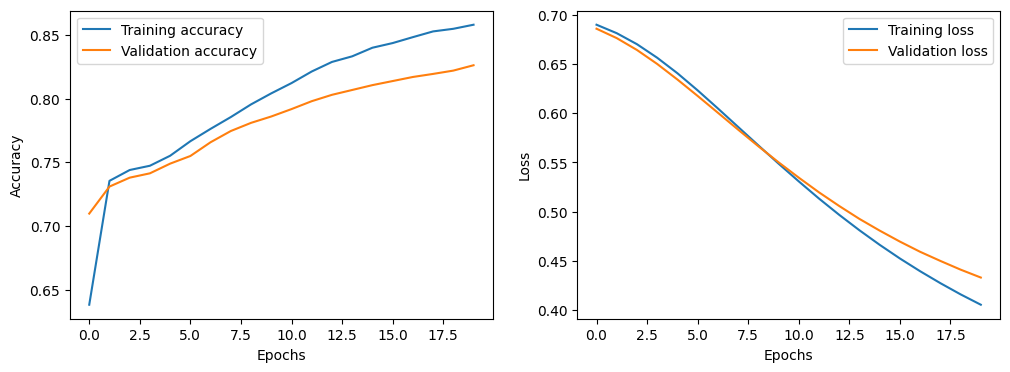

In [ ]:
# Visualize the results
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Q4. Implement CNN using MNIST dataset

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, models, layers
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load and preprocess the dataset
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=30, batch_size=256, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/30
211/211 [==============================] - 55s 254ms/step - loss: 0.6221 - accuracy: 0.7779 - val_loss: 0.4514 - val_accuracy: 0.8390
Epoch 2/30
211/211 [==============================] - 48s 227ms/step - loss: 0.3814 - accuracy: 0.8641 - val_loss: 0.3684 - val_accuracy: 0.8708
Epoch 3/30
211/211 [==============================] - 51s 243ms/step - loss: 0.3368 - accuracy: 0.8798 - val_loss: 0.3192 - val_accuracy: 0.8830
Epoch 4/30
211/211 [==============================] - 55s 258ms/step - loss: 0.3040 - accuracy: 0.8916 - val_loss: 0.3046 - val_accuracy: 0.8935
Epoch 5/30
211/211 [==============================] - 51s 242ms/step - loss: 0.2824 - accuracy: 0.8986 - val_loss: 0.2945 - val_accuracy: 0.8907
Epoch 6/30
211/211 [==============================] - 51s 242ms/step - loss: 0.2671 - accuracy: 0.9040 - val_loss: 0.2757 - val_accuracy: 0.9015
Epoch 7/30
211/211 [==============================] - 51s 240ms/step - loss: 0.2511 - accuracy: 0.9088 - val_loss: 0.2736 - val_ac

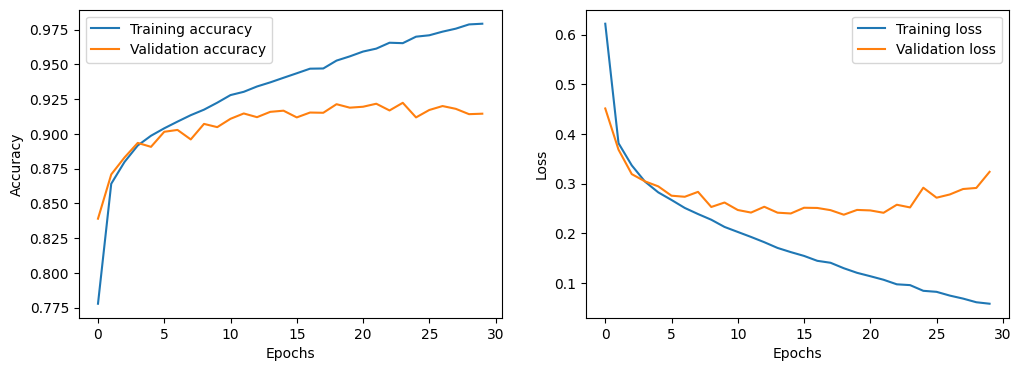

In [ ]:
# Visualize the results
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()